<a href="https://colab.research.google.com/github/Salieri9527/2021DSPrescreen/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **109306012 資管二 曾昭銘**

In [ ]:
%pip install scipy --upgrade
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np

# **Q1-1**

In [ ]:
intialCosts = np.array([250, 650, 250, 500, 700, 30, 350, 70])
selected = np.array([1, 1, 1, 1, 1, 1, 1, 1])
pSuccess = np.array([0.9, 0.7, 0.6, 0.4, 0.8, 0.6, 0.7, 0.9])
minR = np.array([600, 1250, 500, 1600, 1150, 150, 750, 220])
modeR = np.array([750,1500, 600, 1800, 1200, 180, 900, 250])
maxR = np.array([900,1600, 750, 1900, 1400, 250, 1000, 320])
projects = len(selected)

In [ ]:
np.random.seed(5566)
S=10000
revenues=np.zeros((S,projects))
success=np.zeros((S,projects))
finalP=np.zeros((S,projects))
for i in range(projects):
  success[0:S,i] = np.random.binomial(1,pSuccess[i],S)
  revenues[0:S,i] = np.random.triangular(minR[i],modeR[i],maxR[i],S)
  finalP[0:S,i] = (np.multiply(success[:,i],revenues[:,i]) - intialCosts[i]) * selected[i]

avgFinalP = (np.sum(finalP)) / S
print(avgFinalP)


1929.5946688591737


# **Q1-2**

Optimal project selection in class:
*   Profit: 1515.9335125162736
*   Probability: 0.69915




In [ ]:
selected = np.array([1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
np.random.seed(5566)
S=10000
revenues=np.zeros((S,projects))
success=np.zeros((S,projects))
finalP=np.zeros((S,projects))
p=0
for i in range(projects):
  success[0:S,i] = np.random.binomial(1,pSuccess[i],S)
  revenues[0:S,i] = np.random.triangular(minR[i],modeR[i],maxR[i],S)
  finalP[0:S,i] = (np.multiply(success[:,i],revenues[:,i]) - intialCosts[i]) * selected[i]
  
p = np.sum(success) / (8*S)
avgFinalP = (np.sum(finalP)) / S
print("Profit: " + format(avgFinalP))
print("Probability: " + format(p))


Profit: 1455.7248956016765
Probability: 0.69915


# **Q2-1**

In [354]:
seats=19
demand=np.array(range(14,26,1))
demand_prob=np.array([0.03,0.05,0.07,0.09,0.11,0.15,0.18,0.14,0.08,0.05,0.03,0.02])
pshow=0.9
price=150
cost=325

In [355]:
Qs=np.array(range(14,26,1))
Eprofits=np.zeros(len(Qs))

profits=np.zeros((len(Qs),S))
np.random.seed(7788)
S=5000
for i in range(len(Qs)):
    simdemand=np.random.choice(demand,replace=True,p=demand_prob,size=5000)
    for s in range(S):
      d=simdemand[s]
      reserved=min(d,Qs[i])
      show=np.random.binomial(reserved,pshow,1)
      profits[i,s]=price*reserved-cost*max(0,show-seats)
    Eprofits[i]=round(np.mean(profits[i]))
interval=1.96*np.std(profits)/np.sqrt(S)
    #print(Eprofits[i]+interval)
    #print(Eprofits[i]-interval)

print("Optimal Seats: " + format(Qs[np.argmax(Eprofits)]))
print("At 95% confidence level:")
print("Expeted Total Profit: " + format(round(np.max(Eprofits) - interval)) + "~" + format(round(np.max(Eprofits) + interval)))

Optimal Seats: 21
At 95% confidence level:
Expeted Total Profit: 2776~2794


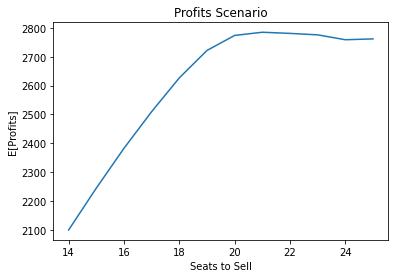

In [356]:
plt.plot(Qs,Eprofits)
plt.xlabel("Seats to Sell")
plt.ylabel("E[Profits]")
plt.title("Profits Scenario")
plt.show()


# **Q2-2**

In [357]:
Qs2=np.array(range(14,26,1))
absense=np.zeros(len(Qs2))
lostSalese=np.zeros(len(Qs2))
Eprofits2=np.zeros(len(Qs))
profits2=np.zeros((len(Qs2),S))
np.random.seed(7788)
S=5000
for i in range(len(Qs2)):
    simdemand=np.random.choice(demand,replace=True,p=demand_prob,size=5000)
    for s in range(S):
      d=simdemand[s]
      reserved=min(d,Qs2[i])
      show=np.random.binomial(reserved,pshow,1)
      profits2[i,s]=price*reserved-cost*max(0,show-seats)
    Eprofits2[i]=round(np.mean(profits[i]))
    absense[i]=cost*max(0,show-seats)
    id_Lost=np.where(absense<1)
    lostSales=len(absense[id_Lost])/S
interval=1.96*np.std(profits2)/np.sqrt(S)
intervalP=1.96*np.sqrt(lostSales*(1-lostSales)/S)
target=(absense!=0).argmax(axis=0) - 1

print(Qs2)
print(absense)
print("Optimal Seats: " + format(Qs2[target]))
print("At 95% confidence level:")
print("Lost Sales: " + format(round(lostSales - intervalP, 4)) + "~" + format(round(lostSales + intervalP, 4)))
print("Expeted Total Profit: " + format(round(Eprofits2[target] - interval)) + "~" + format(round(Eprofits2[target] + interval)))

[14 15 16 17 18 19 20 21 22 23 24 25]
[  0.   0.   0.   0.   0.   0.   0. 325.   0.   0.   0.   0.]
Optimal Seats: 20
At 95% confidence level:
Lost Sales: 0.0009~0.0035
Expeted Total Profit: 2765~2783


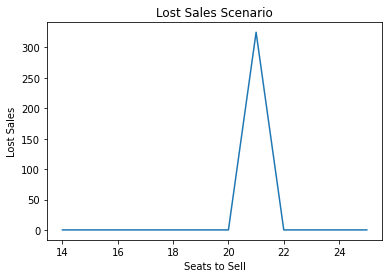

In [358]:
plt.plot(Qs2,absense)
plt.xlabel("Seats to Sell")
plt.ylabel("Lost Sales")
plt.title("Lost Sales Scenario")
plt.show()


# **Q2-3**

Q2-1

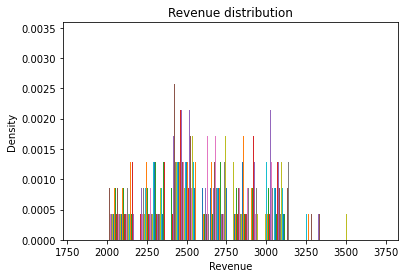

In [359]:
n21, bins21, patches21 = plt.hist(profits, density=True)
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.title("Revenue distribution")
plt.show()

*   Optimal Seats: 21
*   Expeted Total Profit: 2776~2794 (At 95% confidence level)

1.   Decision 1 might have lager profit, but also more lost sales.
2.   Revenue is distributed unequally.



Q2-2

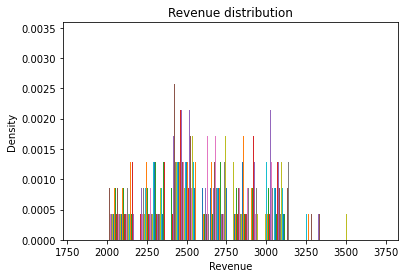

In [360]:
n22, bins22, patches22 = plt.hist(profits2, density=True)
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.title("Revenue distribution")
plt.show()

*   Optimal Seats: 20
*   Expeted Total Profit: 2765~2783 (At 95% confidence level)


1.   Decision 2 might have less profit, but also less lost sales.
2.   Revenue is distributed equally.

# **Q3-1**

In [ ]:
consultantY=80000
threshold=5000
fixedC=3995
variable_cost_meal=11
S=1000
mealSold_mean=3000
mealSold_std=1000
mealSold=np.random.normal(mealSold_mean,mealSold_std,S)
labor_low=5040
labor_upper=6860
laborCost=np.random.uniform(labor_low,labor_upper,S)
mealPrice=np.array([20,18.5,16.5,15])
mealPriceP=np.array([0.25,0.35,0.3,0.1])
simMealPrice=np.random.choice(mealPrice,S,p=mealPriceP)

In [ ]:
profits = np.empty(S)
revenues = np.empty(S)
costs = np.empty(S)
np.random.seed(7788)
for s in range(S):
  revenues[s] = mealSold[s]*simMealPrice[s]
  costs[s] = mealSold[s] * variable_cost_meal + laborCost[s] + fixedC
  profits[s] = revenues[s] - costs[s]

interval=1.96*np.std(profits)/np.sqrt(S)
Eprofits=np.mean(profits)

print("At 95% confidence level:")
print("Expeted Total Profit: " + format(round(np.max(Eprofits) - interval)) + "~" + format(round(np.max(Eprofits) + interval)))

At 95% confidence level:
Expeted Total Profit: 10668~11776


# **Q3-2**

In [ ]:
part_minimum=3500
part_thres=9000
profits_pat=np.empty(S)
for s in range(S):
  profits_pat[s]=mealSold[s]*(simMealPrice[s]-variable_cost_meal)-laborCost[s]-fixedC
  if(profits_pat[s]<part_minimum):
    profits_pat[s]=part_minimum
  elif(profits[s]>part_thres):
    profits_pat[s]=(profits_pat[s]-part_thres)*0.1+part_thres
  else:
    profits_pat[s]=profits_pat[s]

interval=1.96*np.std(profits_pat)/np.sqrt(S)
Eprofits2=np.mean(profits_pat)

print("At 95% confidence level:")
print("Expeted Total Profit: " + format(round(np.max(Eprofits2) - interval)) + "~" + format(round(np.max(Eprofits2) + interval)))

At 95% confidence level:
Expeted Total Profit: 7536~7873


**Reject.**

# **Q3-3**

In [ ]:
count = 0
for s in range(S):
  if profits[s] > profits_pat[s]:
    count = count + 1

p = count / S
print("Probability: " + format(p))

Probability: 0.636


# **Q3-4**

In [ ]:
J=50
I=12
profits_Y = np.empty(J)
np.random.seed(7788)
for j in range(J):
  profits_Y[j]=0
  for i in range(I):
    profits_Y[j] += profits[j*12+i]

interval=1.96*np.std(profits_Y)/np.sqrt(S)
Eprofits_Y=np.mean(profits_Y)

print("At 95% confidence level:")
print("Expeted Total Profit: " + format(round(np.max(Eprofits_Y) - interval)) + "~" + format(round(np.max(Eprofits_Y) + interval)))

At 95% confidence level:
Expeted Total Profit: 138746~142408


In [ ]:
J=50
I=12
profits_Pat_Y = np.empty(J)
np.random.seed(7788)
for j in range(J):
  profits_Pat_Y[j]=0
  for i in range(I):
    profits_Pat_Y[j] += profits_pat[j*12+i]

interval=1.96*np.std(profits_Pat_Y)/np.sqrt(S)
Eprofits_Pat_Y=np.mean(profits_Pat_Y)

print("At 95% confidence level:")
print("Expeted Total Profit: " + format(round(np.max(Eprofits_Pat_Y) - interval)) + "~" + format(round(np.max(Eprofits_Pat_Y) + interval)))

At 95% confidence level:
Expeted Total Profit: 94011~94928
